In [9]:
using Revise
using BilevelTrajOpt

using RigidBodyDynamics
using Plots
gr(size=(500,500), html_output_format=:png);

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
velocity_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [34]:
q0 = [1., 0., 0., 0., 0., 0., 0.015]
v0 = [0., 0., 0., 0.5, 0., 0.]
N = 25

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] .= 0.;

In [ ]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

In [41]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
  0.000552 seconds (1.81 k allocations: 273.813 KiB)
  0.000347 seconds (1.81 k allocations: 273.813 KiB)
  0.000343 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000323 seconds (1.81 k allocations: 273.813 KiB)
  0.000334 seconds (1.81 k allocations: 273.813 KiB)
  0.000330 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000350 seconds (1.81 k allocations: 273.813 KiB)
  0.000362 seconds (1.81 k allocations: 273.813 KiB)
  0.000410 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000330 seconds (1.81 k allocations: 273.813 KiB)
  0.000340 seconds (1.81 k allocations: 273.813 KiB)
  0.000337 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000334 seconds (1.81 k allocations: 273.813 KiB)
  0.000349 seconds (1.81 k allocations: 273.813 KiB)
  0.000348 seconds (

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

Implicit Contacts
 22.395908 seconds (24.45 M allocations: 1.225 GiB, 4.75% gc time)
  0.325118 seconds (1.41 M allocations: 263.409 MiB, 35.14% gc time)
  0.324871 seconds (1.41 M allocations: 263.398 MiB, 35.10% gc time)
  0.325685 seconds (1.41 M allocations: 263.399 MiB, 35.43% gc time)
Finished successfully: feasible point found
  0.322342 seconds (1.41 M allocations: 263.410 MiB, 35.47% gc time)
  0.324236 seconds (1.41 M allocations: 263.410 MiB, 35.35% gc time)
  0.326091 seconds (1.41 M allocations: 263.398 MiB, 35.10% gc time)
  0.325408 seconds (1.41 M allocations: 263.399 MiB, 35.13% gc time)
Finished successfully: feasible point found
  0.326365 seconds (1.41 M allocations: 263.409 MiB, 35.28% gc time)
  0.324032 seconds (1.41 M allocations: 263.409 MiB, 35.39% gc time)
  0.327024 seconds (1.41 M allocations: 263.398 MiB, 35.08% gc time)
  0.325678 seconds (1.41 M allocations: 263.399 MiB, 35.29% gc time)
Finished successfully: feasible point found
  0.322782 seconds (1.41

  0.327085 seconds (1.41 M allocations: 263.402 MiB, 35.36% gc time)
  0.324245 seconds (1.41 M allocations: 263.402 MiB, 35.18% gc time)
  0.335134 seconds (1.41 M allocations: 263.400 MiB, 37.03% gc time)
  0.327975 seconds (1.41 M allocations: 263.398 MiB, 35.27% gc time)
Finished successfully: feasible point found
  0.325012 seconds (1.41 M allocations: 263.400 MiB, 35.14% gc time)
  0.324760 seconds (1.41 M allocations: 263.400 MiB, 35.18% gc time)
  0.325333 seconds (1.41 M allocations: 263.400 MiB, 35.37% gc time)
  0.326107 seconds (1.41 M allocations: 263.400 MiB, 35.34% gc time)
  0.325769 seconds (1.41 M allocations: 263.402 MiB, 35.21% gc time)
  0.326526 seconds (1.41 M allocations: 263.402 MiB, 35.20% gc time)
  0.326494 seconds (1.41 M allocations: 263.402 MiB, 35.22% gc time)
  0.328017 seconds (1.41 M allocations: 263.402 MiB, 35.34% gc time)
  0.362425 seconds (1.41 M allocations: 263.405 MiB, 34.05% gc time)
  0.332835 seconds (1.41 M allocations: 263.402 MiB, 34.45%

  0.333555 seconds (1.41 M allocations: 263.410 MiB, 34.79% gc time)
  0.351164 seconds (1.41 M allocations: 263.402 MiB, 34.53% gc time)
  0.334113 seconds (1.41 M allocations: 263.401 MiB, 34.78% gc time)
  0.333573 seconds (1.41 M allocations: 263.411 MiB, 34.83% gc time)
  0.333494 seconds (1.41 M allocations: 263.409 MiB, 34.69% gc time)
  0.335443 seconds (1.41 M allocations: 263.402 MiB, 34.58% gc time)
  0.335926 seconds (1.41 M allocations: 263.402 MiB, 34.65% gc time)
  0.340779 seconds (1.41 M allocations: 263.410 MiB, 34.71% gc time)
  0.338414 seconds (1.41 M allocations: 263.409 MiB, 35.04% gc time)
  0.353868 seconds (1.41 M allocations: 263.402 MiB, 33.61% gc time)


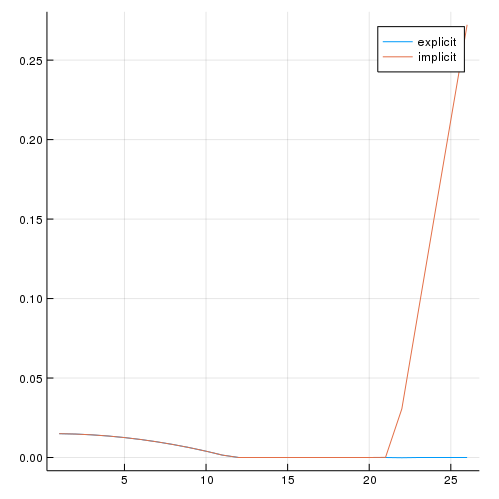

In [118]:
ts = cumsum([Δt for i in 1:N]);
j = 7
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")